In [2]:
# -----------------------------------
# 1. Kütüphane Yükleme
# -----------------------------------
!pip install kagglehub[pandas-datasets] --quiet
!pip install scikit-learn matplotlib seaborn joblib --quiet

import kagglehub
from kagglehub import KaggleDatasetAdapter


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib
import warnings
warnings.filterwarnings("ignore")


In [4]:
# -----------------------------------
# 2. Veri Setini Yükleme
# -----------------------------------
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "atharvaingle/crop-recommendation-dataset",
    path="Crop_recommendation.csv"
)

print("🔹 Veri seti ilk 5 satır:")
df.head()



🔹 Veri seti ilk 5 satır:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [26]:

print("🔹 Veri setinin 200. satırı:")
df.iloc[199]


🔹 Veri setinin 200. satırı:


,199
N,83
P,57
K,19
temperature,25.730444
humidity,70.747393
ph,6.877869
rainfall,98.737713
label,maize


In [5]:
# -----------------------------------
# 3. Veri Hakkında Temel Bilgiler
# -----------------------------------
print("🔹 Veri bilgisi:")
df.info()

print("\n🔹 Eksik değer kontrolü:")
print(df.isnull().sum())

print("\n🔹 Sınıf (ürün) dağılımı:")
print(df['label'].value_counts())


🔹 Veri bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

🔹 Eksik değer kontrolü:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

🔹 Sınıf (ürün) dağılımı:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    10

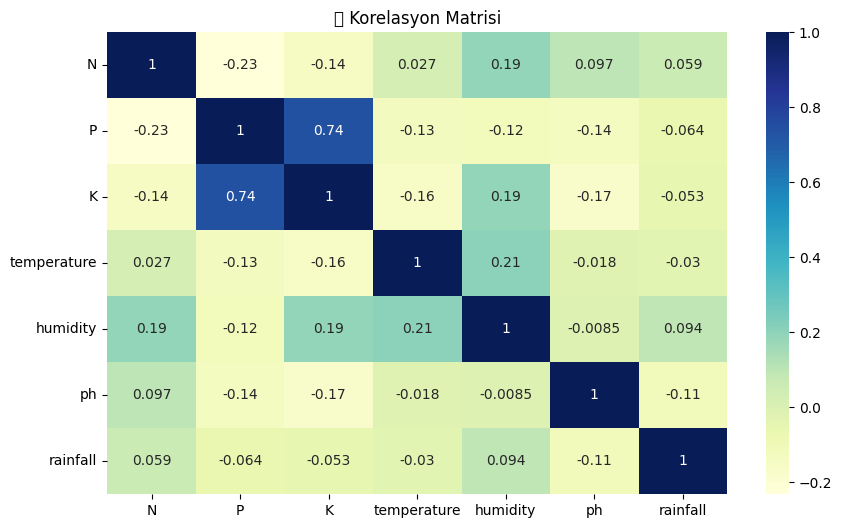

In [6]:
# -----------------------------------
# 4. Korelasyon Matrisi ile Özellik Analizi (DÜZENLENMİŞ)
# -----------------------------------

# Sadece sayısal sütunlarla korelasyon al
numerical_features = df.drop("label", axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap="YlGnBu")
plt.title("🔍 Korelasyon Matrisi")
plt.show()


In [7]:
# -----------------------------------
# 5. Özellik Seçimi (SelectKBest)
# -----------------------------------
X = df.drop('label', axis=1)
y = df['label']


In [8]:
# Özellikleri skorlama
selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': fit.scores_})
print("\n🔹 Özellik Skorları:")
print(feature_scores.sort_values(by="Score", ascending=False))



🔹 Özellik Skorları:
       Feature         Score
2            K  27238.362067
4     humidity   3103.708891
1            P   1885.657859
0            N    897.568186
6     rainfall    605.527966
3  temperature    102.186981
5           ph     60.344034


In [9]:
# -----------------------------------
# 6. Veri Ölçekleme
# -----------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop('label', axis=1)
y = df['label']

X_scaled = scaler.fit_transform(X)


In [10]:

# -----------------------------------
# 7. Eğitim/Test Ayrımı
# -----------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [14]:
!pip install xgboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

# Assuming you have already defined X_scaled and y
# 1. Label encode (etiketleri geçici olarak sayıya çeviriyoruz)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2. Eğitim-test böl
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 3. Modelleri tanımla
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

# 4. Eğit ve değerlendir
performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    performance[name] = {
        "Accuracy": accuracy,
        "F1 Score": f1
    }

performance


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[

{'Random Forest': {'Accuracy': 0.9931818181818182,
  'F1 Score': 0.9931754816901672},
 'KNN': {'Accuracy': 0.9568181818181818, 'F1 Score': 0.9567492608232794},
 'Decision Tree': {'Accuracy': 0.9863636363636363,
  'F1 Score': 0.9863152866630287},
 'XGBoost': {'Accuracy': 0.9863636363636363, 'F1 Score': 0.986347164805032},
 'LightGBM': {'Accuracy': 0.9863636363636363, 'F1 Score': 0.986427869786983},
 'CatBoost': {'Accuracy': 0.9886363636363636, 'F1 Score': 0.9886978413509432}}

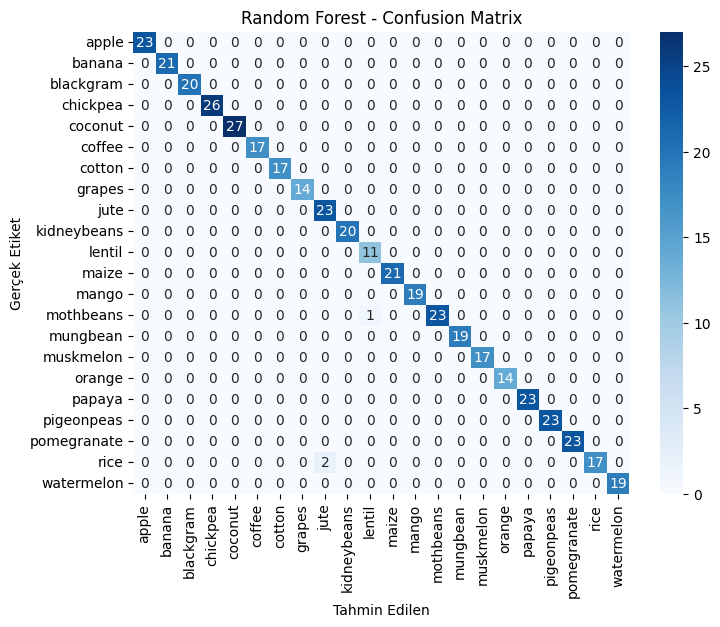

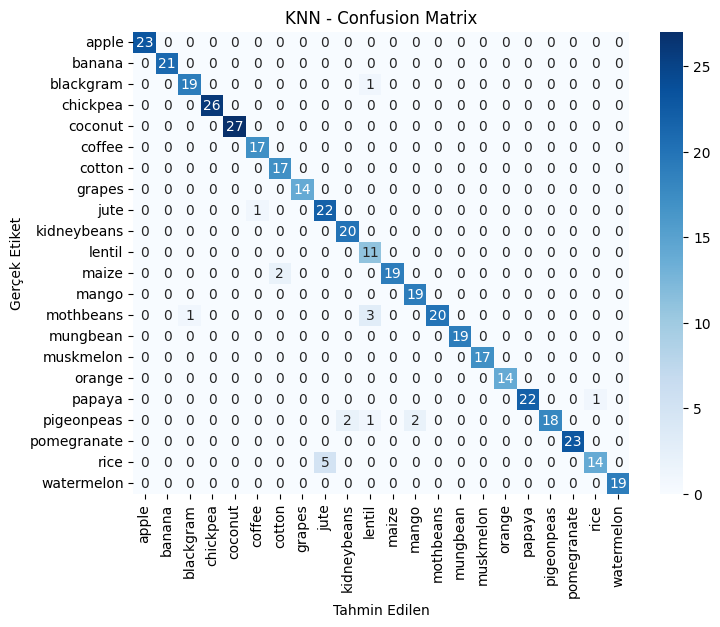

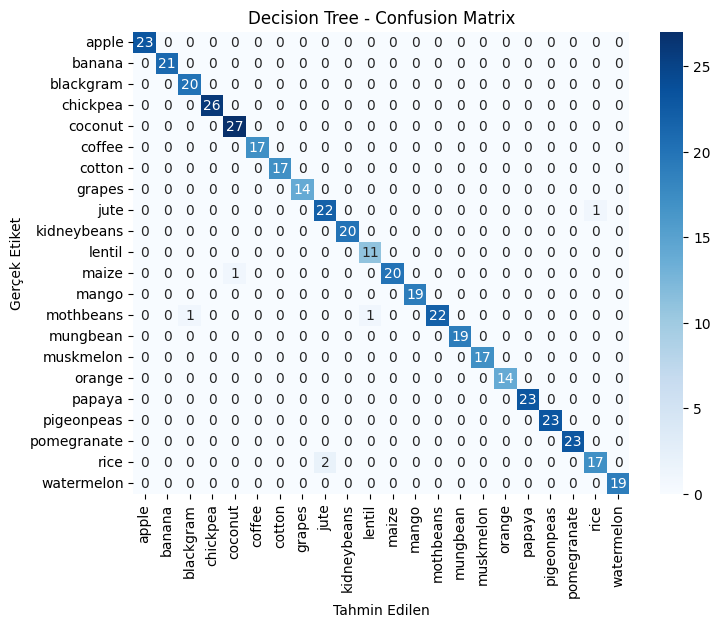

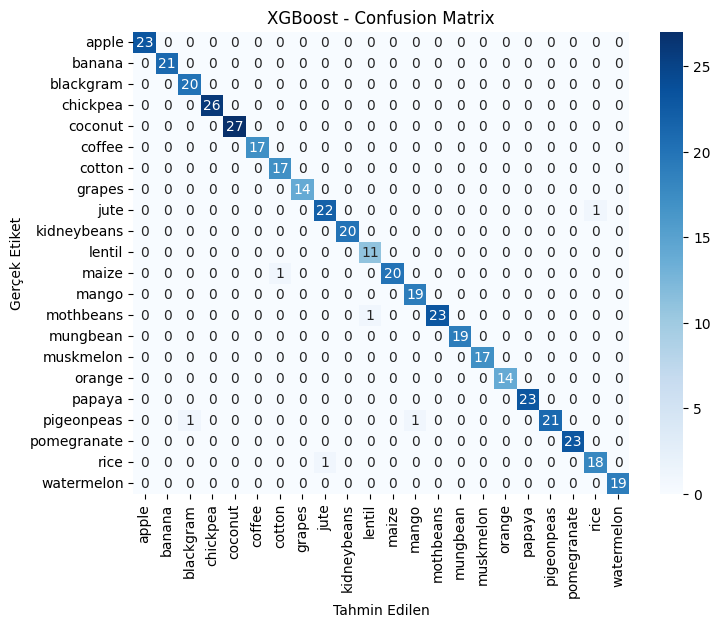

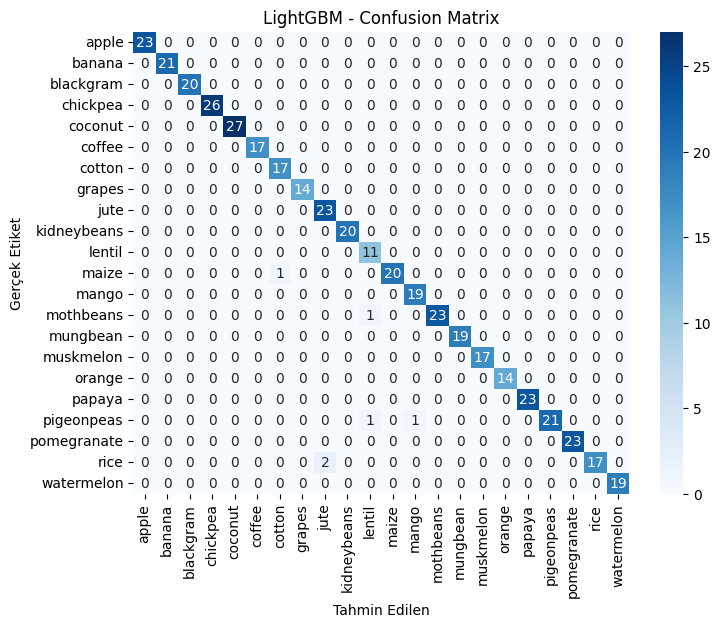

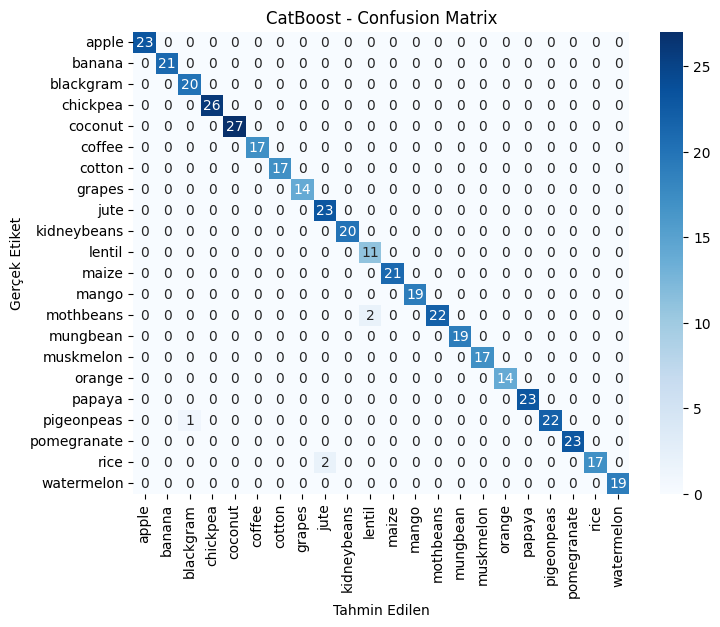

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix için her modelin tahminlerini görselleştirelim
for name, model in models.items():
    y_pred = model.predict(X_test)  # Modelin tahminini alıyoruz

    cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix hesapla
    plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarla
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)  # Isı haritası ile görselleştir
    plt.xlabel('Tahmin Edilen')  # X ekseni için etiket
    plt.ylabel('Gerçek Etiket')  # Y ekseni için etiket
    plt.title(f'{name} - Confusion Matrix')  # Başlık
    plt.show()  # Grafik göster


In [17]:
# -----------------------------------
# 3. Veri Hakkında Temel Bilgiler
# -----------------------------------
print("🔹 Veri bilgisi:")
df.info()

print("\n🔹 Eksik değer kontrolü:")
print(df.isnull().sum())

print("\n🔹 Sınıf (ürün) dağılımı:")
print(df['label'].value_counts())


🔹 Veri bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

🔹 Eksik değer kontrolü:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

🔹 Sınıf (ürün) dağılımı:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    10

In [18]:
import joblib
from sklearn.preprocessing import StandardScaler

# Performansları yazdırma
print(performance)

# En iyi modeli bulma (en yüksek Accuracy skoruna göre)
best_model_name = max(performance, key=lambda x: performance[x]['Accuracy'])
best_model = models[best_model_name]

# En iyi modeli kaydetme
joblib.dump(best_model, f'{best_model_name}_model.pkl')

# Eğer scaler kullanıyorsanız, ilgili scaler'ı kaydedin
# (Burada scaler, en iyi modelin eğitiminde kullanılan scaler'dır)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Bu adım, verinizi ölçeklendiriyor

# En iyi modelin scaler'ını kaydediyoruz
joblib.dump(scaler, f'{best_model_name}_scaler.pkl')

print(f"En iyi model '{best_model_name}' ve scaler kaydedildi.")


{'Random Forest': {'Accuracy': 0.9931818181818182, 'F1 Score': 0.9931754816901672}, 'KNN': {'Accuracy': 0.9568181818181818, 'F1 Score': 0.9567492608232794}, 'Decision Tree': {'Accuracy': 0.9863636363636363, 'F1 Score': 0.9863152866630287}, 'XGBoost': {'Accuracy': 0.9863636363636363, 'F1 Score': 0.986347164805032}, 'LightGBM': {'Accuracy': 0.9863636363636363, 'F1 Score': 0.986427869786983}, 'CatBoost': {'Accuracy': 0.9886363636363636, 'F1 Score': 0.9886978413509432}}
En iyi model 'Random Forest' ve scaler kaydedildi.


In [19]:
from google.colab import files

# Model ve scaler dosyalarını indir
files.download("Random Forest_model.pkl")  # En iyi modeli indirmek için
files.download("Random Forest_scaler.pkl")  # En iyi scaler'ı indirmek için


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import numpy as np
import joblib

# 1. Modeli ve scaler'ı yükle
best_model = joblib.load('Random Forest_model.pkl')
scaler = joblib.load('Random Forest_scaler.pkl')

# 2. Yeni veriyi hazırlama (örnek olarak 1 satırlık veri)
# Bu, modelinize uygun olan tüm özelliklere sahip olmalı.
# Örneğin: [N, P, K, temperature, humidity, ph, rainfall, vb.]
new_data = np.array([[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]])

# 3. Veriyi ölçeklendir
new_data_scaled = scaler.transform(new_data)

# 4. Modeli kullanarak tahmin yap
prediction = best_model.predict(new_data_scaled)

# 5. Sonucu geri dönüştür (etiketlere, örneğin 'mısır', 'buğday' gibi)
predicted_label = le.inverse_transform(prediction)

# 6. Tahmini yazdır
print(f"Tahmin edilen etiket: {predicted_label[0]}")


Tahmin edilen etiket: rice


In [23]:
print(list(le.classes_))


['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']


In [24]:
import joblib

# etiket isimleri
label_names = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize', 'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

# Kaydet
joblib.dump(label_names, "label_names.pkl")


['label_names.pkl']